<a href="https://colab.research.google.com/github/LimaJorge/Matri/blob/main/AnaliseElei%C3%A7%C3%B5es2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Big Data com Python - Eleições Presidenciais do Brasil (2018)**

**Importando as Bibliotecas Necessárias para o Projeto**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Criando nosso DataFrame a partir da planilha**

In [ ]:
df = pd.read_csv('drive/MyDrive/PlanilhaEleições/votacao_secao_2018_BR.csv', encoding='latin1', sep=';')

**Analisando se há colunas sem valores "Nulas"**

In [ ]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
CD_TIPO_ELEICAO,0
NM_TIPO_ELEICAO,0
NR_TURNO,0
CD_ELEICAO,0
DS_ELEICAO,0
DT_ELEICAO,0
TP_ABRANGENCIA,0


**Criando uma Variável com os Nomes dos Candidatos**

In [ ]:
candidatos = list(df.NM_VOTAVEL.unique())
candidatos

['VOTO BRANCO',
 'JAIR MESSIAS BOLSONARO',
 'VOTO NULO',
 'BENEVENUTO DACIOLO FONSECA DOS SANTOS',
 'FERNANDO HADDAD',
 'CIRO FERREIRA GOMES',
 'ALVARO FERNANDES DIAS',
 'GUILHERME CASTRO BOULOS',
 'MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA',
 'GERALDO JOSÉ RODRIGUES ALCKMIN FILHO',
 'JOÃO VICENTE FONTELLA GOULART',
 'JOSE MARIA EYMAEL',
 'JOÃO DIONISIO FILGUEIRA BARRETO AMOEDO',
 'HENRIQUE DE CAMPOS MEIRELLES',
 'VERA LUCIA PEREIRA DA SILVA SALGADO',
 'VOTO ANULADO E APURADO EM SEPARADO']

**Juntando as Cidades de Estados na Coluna Cidade**

In [ ]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

**Quantidade de Municípios Eleitorais**

In [ ]:
len(df.NM_MUNICIPIO.unique())

5708

**Separando nosso dataframe por Turno 1 e Turno 2**

In [ ]:
#separando os dataframes de primeiro e segundo turno
df_turno1 = df[df.NR_TURNO == 1]
df_turno2 = df[df.NR_TURNO == 2]


#**Votos Por Candidato no Primeiro Turno**

In [ ]:
# Agrupa os votos por candidato e soma a quantidade de votos
votos_por_candidato = df_turno1.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos
votos_por_candidato = votos_por_candidato.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os em ordem decrescente
votos_por_candidato = votos_por_candidato.sort_values(ascending=False)

# Aqui calculamos a porcentagem de votos por candidato
total_votos = votos_por_candidato.sum()
porcentagens = (votos_por_candidato / total_votos) * 100




**Tabela**

In [ ]:
# Criando um DataFrame com os votos e porcentagens
tabela_votos = pd.DataFrame({
    'Candidato': votos_por_candidato.index,
    'Votos': votos_por_candidato.values,
    'Porcentagem': [f"{p:.2f}%" for p in porcentagens.values]
})

tabela_votos

Tabela de Votos - Primeiro Turno (2018)


,Candidato,Votos,Porcentagem
0,JAIR MESSIAS BOLSONARO,49277010,46.03%
1,FERNANDO HADDAD,31342051,29.28%
2,CIRO FERREIRA GOMES,13344371,12.47%
3,GERALDO JOSÉ RODRIGUES ALCKMIN FILHO,5096350,4.76%
4,JOÃO DIONISIO FILGUEIRA BARRETO AMOEDO,2679745,2.50%
5,BENEVENUTO DACIOLO FONSECA DOS SANTOS,1348323,1.26%
6,HENRIQUE DE CAMPOS MEIRELLES,1288950,1.20%
7,MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA,1069578,1.00%
8,ALVARO FERNANDES DIAS,859601,0.80%
9,GUILHERME CASTRO BOULOS,617122,0.58%


**Gráfico**

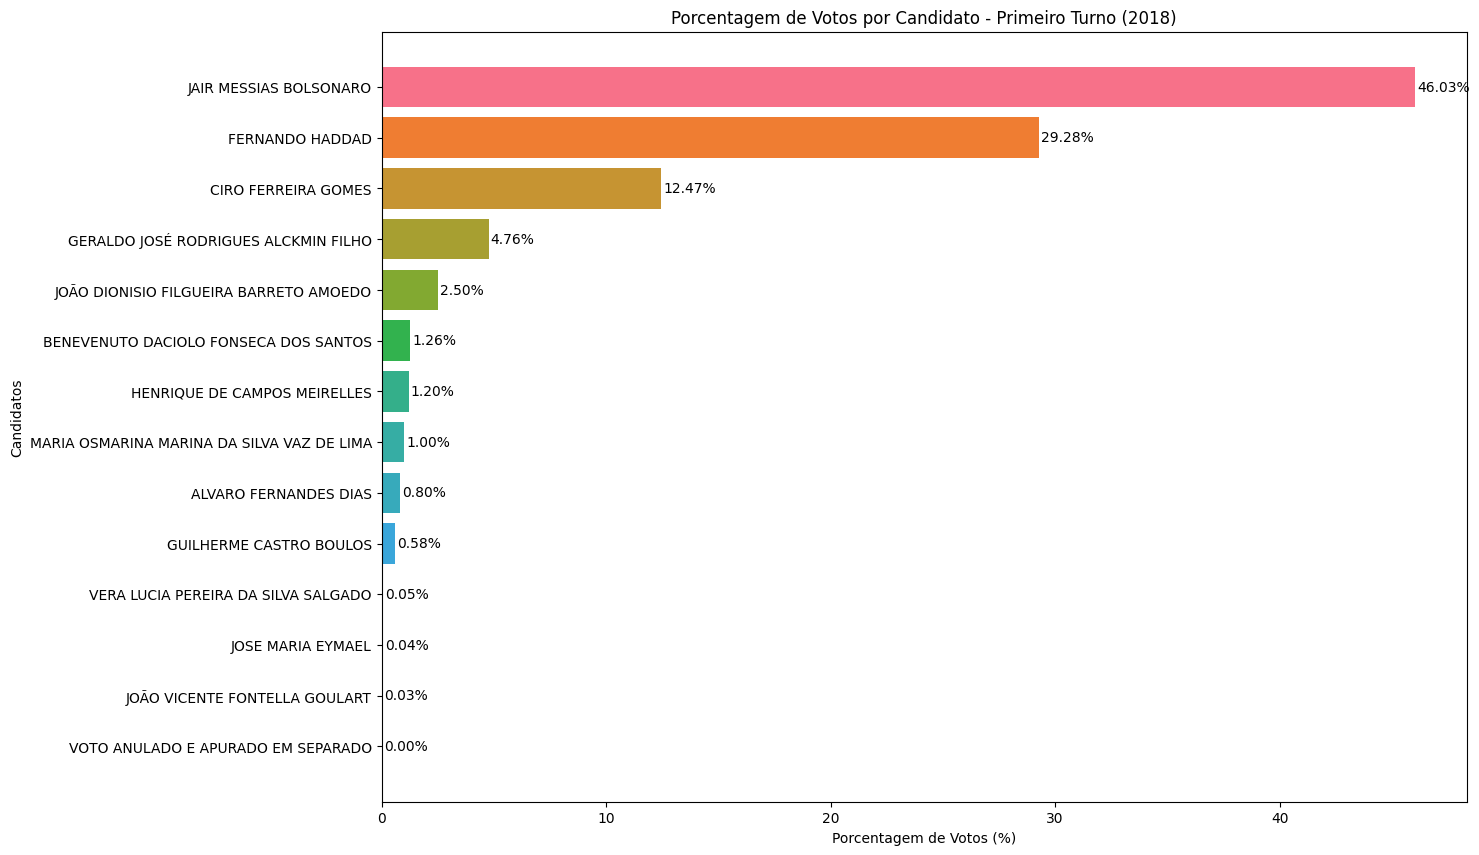

In [ ]:
plt.figure(figsize=(14, 10))
cores = sns.color_palette("husl", len(votos_por_candidato))

plt.barh(votos_por_candidato.index, porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Primeiro Turno (2018)")

for i, v in enumerate(porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Os 4 Candidatos Mais Votados no Primeiro Turno**

In [ ]:
top4_candidatos = votos_por_candidato.head(4)
top4_porcentagens = porcentagens.head(4)



**Tabela**

In [ ]:
top4_df = pd.DataFrame({
    'Candidato': top4_candidatos.index,
    'Votos': top4_candidatos.values,
    'Porcentagem': [f"{p:.2f}%" for p in top4_porcentagens.values]
})
print("Tabela dos 4 Mais Votados - Primeiro Turno (2018)")
top4_df

Tabela dos 4 Mais Votados - Primeiro Turno (2018)


,Candidato,Votos,Porcentagem
0,JAIR MESSIAS BOLSONARO,49277010,46.03%
1,FERNANDO HADDAD,31342051,29.28%
2,CIRO FERREIRA GOMES,13344371,12.47%
3,GERALDO JOSÉ RODRIGUES ALCKMIN FILHO,5096350,4.76%


**Gráfico**

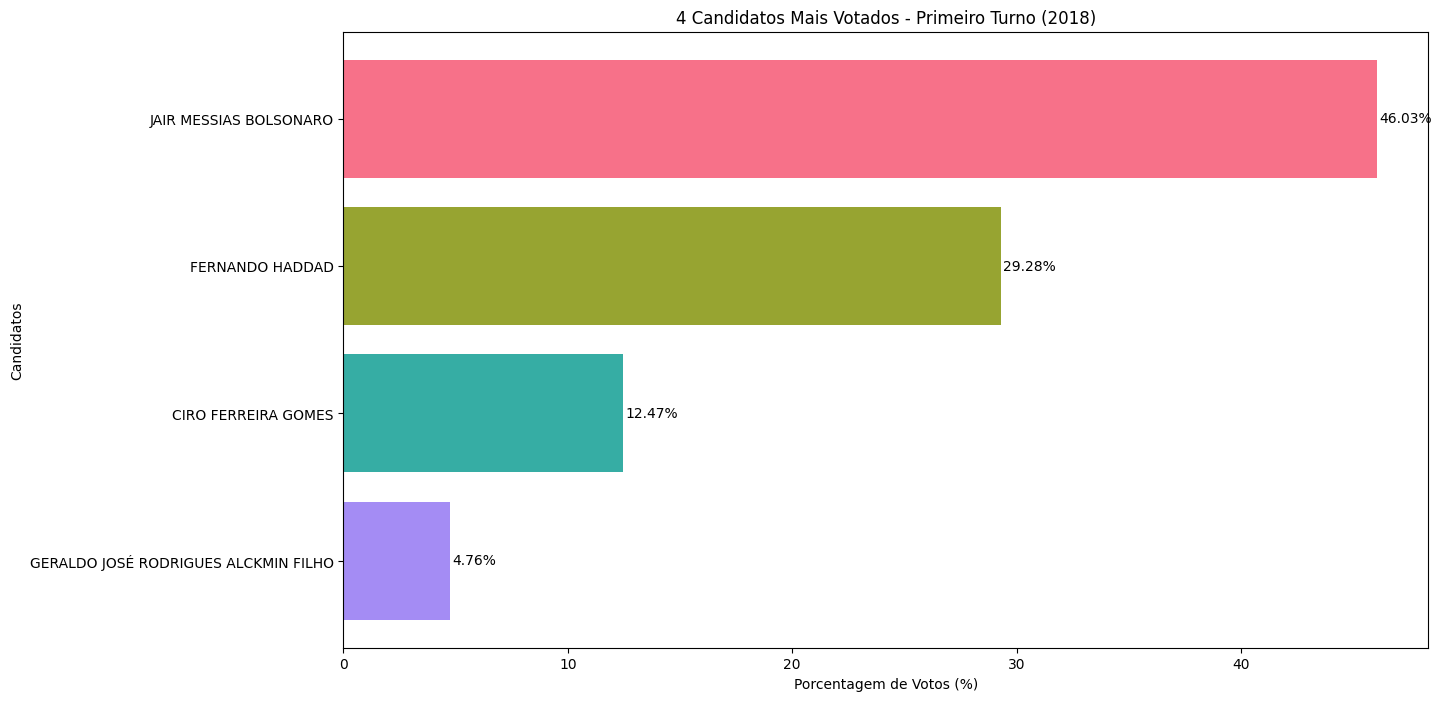

In [ ]:
plt.figure(figsize=(14, 8))
cores = sns.color_palette("husl", len(top4_candidatos))

plt.barh(top4_candidatos.index, top4_porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("4 Candidatos Mais Votados - Primeiro Turno (2018)")

for i, v in enumerate(top4_porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Votos Brancos e Nulos no Primeiro Turno**

In [ ]:
# Calculando votos nulos e brancos
votos_nulos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

# Total de votos nulos e brancos
total_nulos_brancos = votos_nulos + votos_brancos

# Total de votos válidos (excluindo nulos e brancos)
total_votos_validos = df_turno1['QT_VOTOS'].sum() - total_nulos_brancos



**Tabela**

In [ ]:
# Porcentagem de votos nulos e brancos
percent_nulos = (votos_nulos / df_turno1['QT_VOTOS'].sum()) * 100
percent_brancos = (votos_brancos / df_turno1['QT_VOTOS'].sum()) * 100

# Criando a tabela
data = {'Tipo de Voto': ['Brancos', 'Nulos', 'Total'],
        'Quantidade': [votos_brancos, votos_nulos, total_nulos_brancos],
        'Porcentagem': [f'{percent_brancos:.2f}%', f'{percent_nulos:.2f}%', f'{(percent_brancos + percent_nulos):.2f}%']}

tabela_nulos_brancos = pd.DataFrame(data)

print("Tabela de Votos Brancos e Nulos - Primeiro Turno (2018)")
tabela_nulos_brancos

Tabela de Votos Brancos e Nulos - Primeiro Turno (2018)


,Tipo de Voto,Quantidade,Porcentagem
0,Brancos,3106937,2.65%
1,Nulos,7206222,6.14%
2,Total,10313159,8.79%


**Gráfico**

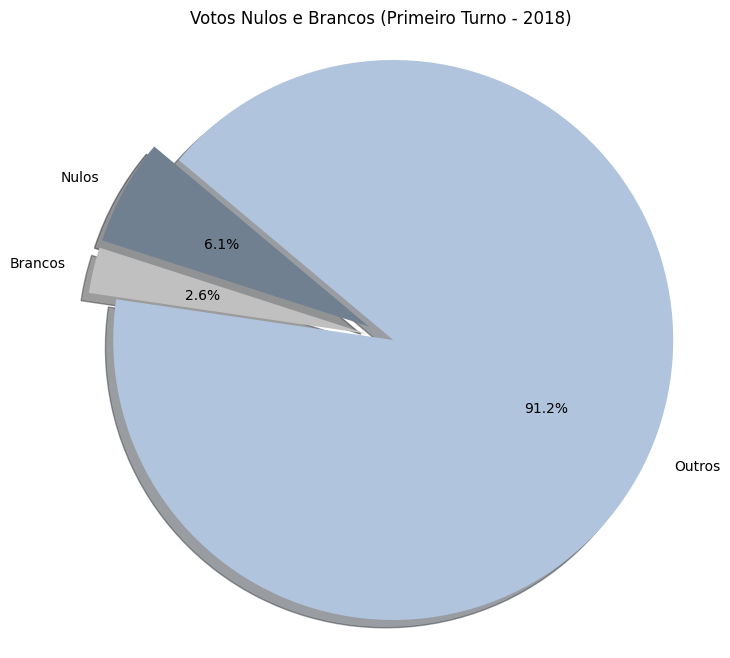

In [ ]:
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos, votos_brancos, total_votos_validos]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Votos Nulos e Brancos (Primeiro Turno - 2018)')
plt.show()

#**Votos por Candidato no Segundo Turno**

In [ ]:
# Agrupa os votos por candidato e soma a quantidade de votos para o segundo turno
votos_por_candidato_t2 = df_turno2.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos do segundo turno
votos_por_candidato_t2 = votos_por_candidato_t2.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os votos em ordem decrescente para o segundo turno
votos_por_candidato_t2 = votos_por_candidato_t2.sort_values(ascending=False)

# Calculando a porcentagem de votos por candidato para o segundo turno
total_votos_t2 = votos_por_candidato_t2.sum()
porcentagens_t2 = (votos_por_candidato_t2 / total_votos_t2) * 100


**Tabela**

In [ ]:
tabela_votos_t2 = pd.DataFrame({
    'Candidato': votos_por_candidato_t2.index,
    'Votos': votos_por_candidato_t2.values,
    'Porcentagem': [f"{p:.2f}%" for p in porcentagens_t2.values]
})
print("Tabela de Votos - Segundo Turno (2018)")
tabela_votos_t2

Tabela de Votos - Segundo Turno (2018)


,Candidato,Votos,Porcentagem
0,JAIR MESSIAS BOLSONARO,57797847,55.13%
1,FERNANDO HADDAD,47040906,44.87%


**Gráfico**

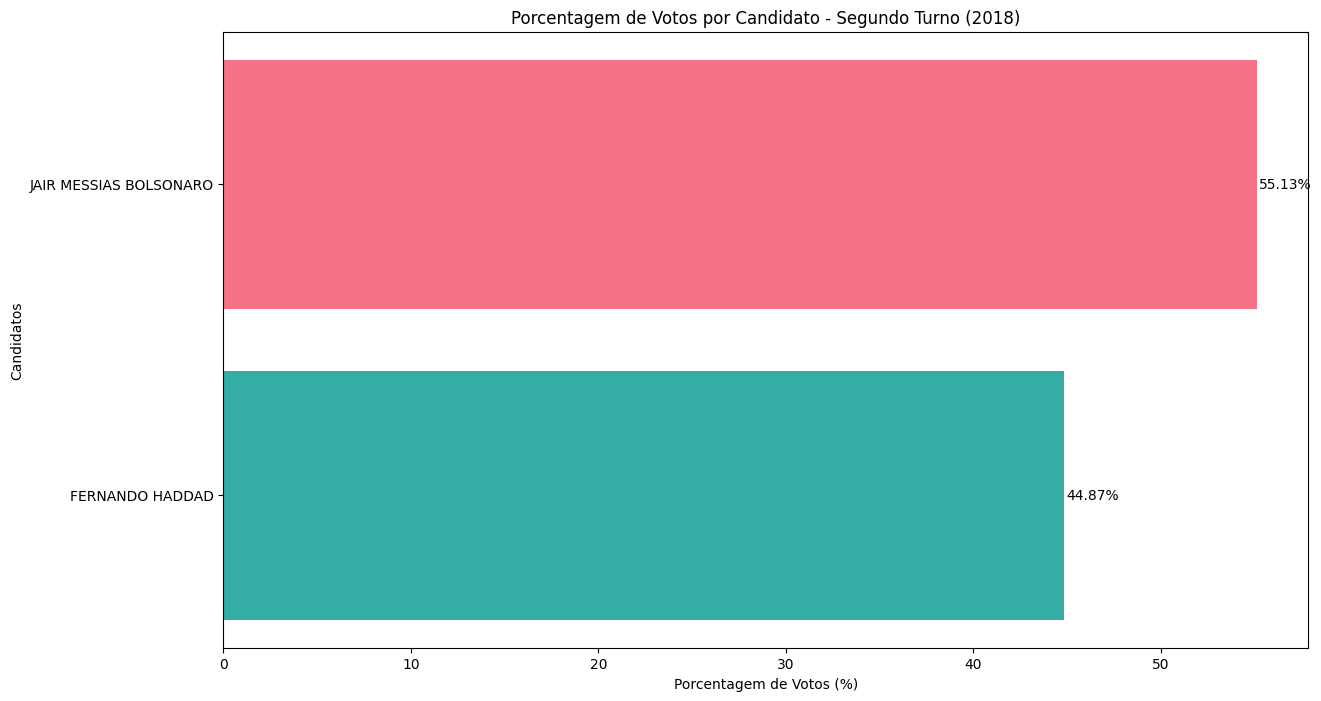

In [104]:
plt.figure(figsize=(14, 8))
cores = sns.color_palette("husl", len(votos_por_candidato_t2))

plt.barh(votos_por_candidato_t2.index, porcentagens_t2, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Segundo Turno (2018)")

for i, v in enumerate(porcentagens_t2):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Votos Brancos e Nulos Segundo turno**

In [ ]:
# Calculando votos nulos e brancos
votos_nulos2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

# Total de votos nulos e brancos
total_nulos_brancos2 = votos_nulos2 + votos_brancos2

#(excluindo nulos e brancos)
total_votos_validos2 = df_turno2['QT_VOTOS'].sum() - total_nulos_brancos2


**Tabela**

In [ ]:
percent_nulos2 = (votos_nulos / df_turno2['QT_VOTOS'].sum()) * 100
percent_brancos2 = (votos_brancos / df_turno2['QT_VOTOS'].sum()) * 100

data2 = {'Tipo de Voto': ['Brancos', 'Nulos', 'Total'],
        'Quantidade': [votos_brancos2, votos_nulos2, total_nulos_brancos2],
        'Porcentagem': [f'{percent_brancos2:.2f}%', f'{percent_nulos2:.2f}%', f'{(percent_brancos2 + percent_nulos2):.2f}%']}

tabela_nulos_brancos2 = pd.DataFrame(data2)

print("Tabela de Votos Brancos e Nulos - Segundo Turno (2018)")
tabela_nulos_brancos2

Tabela de Votos Brancos e Nulos - Segundo Turno (2018)


,Tipo de Voto,Quantidade,Porcentagem
0,Brancos,2486593,2.68%
1,Nulos,8608105,6.22%
2,Total,11094698,8.90%


**Gráfico**

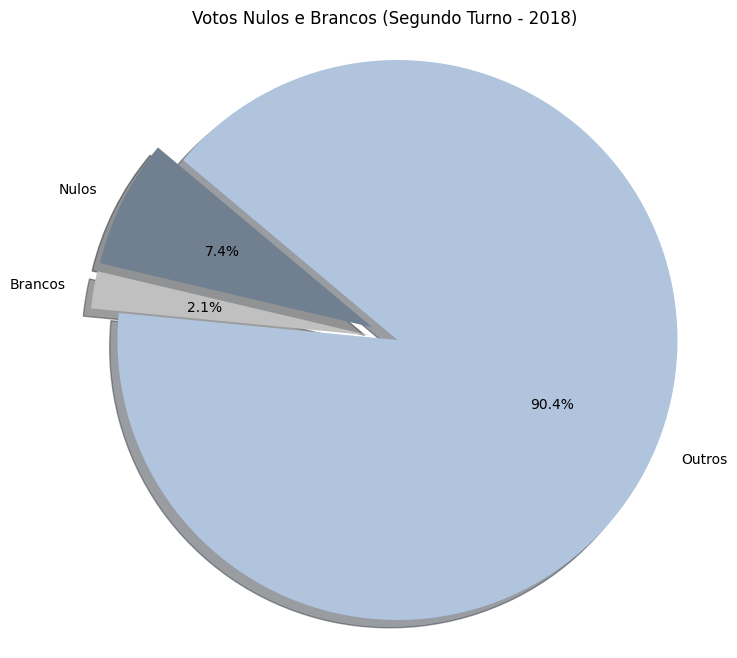

In [ ]:
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos2, votos_brancos2, total_votos_validos2]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Votos Nulos e Brancos (Segundo Turno - 2018)')
plt.show()

#**Votos Por Estado no Primeiro Turno**

In [ ]:
votos_por_estado = df_turno1.groupby('SG_UF')['QT_VOTOS'].sum()

votos_por_estado = votos_por_estado.sort_values(ascending=False)


**Tabela**

In [105]:
votos_por_estado_df = pd.DataFrame({'UF': votos_por_estado.index, 'Total de Votos': votos_por_estado.values})
votos_por_estado_df

,UF,Total de Votos
0,SP,25930749
1,MG,12214681
2,RJ,9479580
3,BA,8236847
4,RS,6838548
5,PR,6620465
6,PE,5393186
7,CE,5244712
8,PA,4401798
9,SC,4246278


**Gráfico**

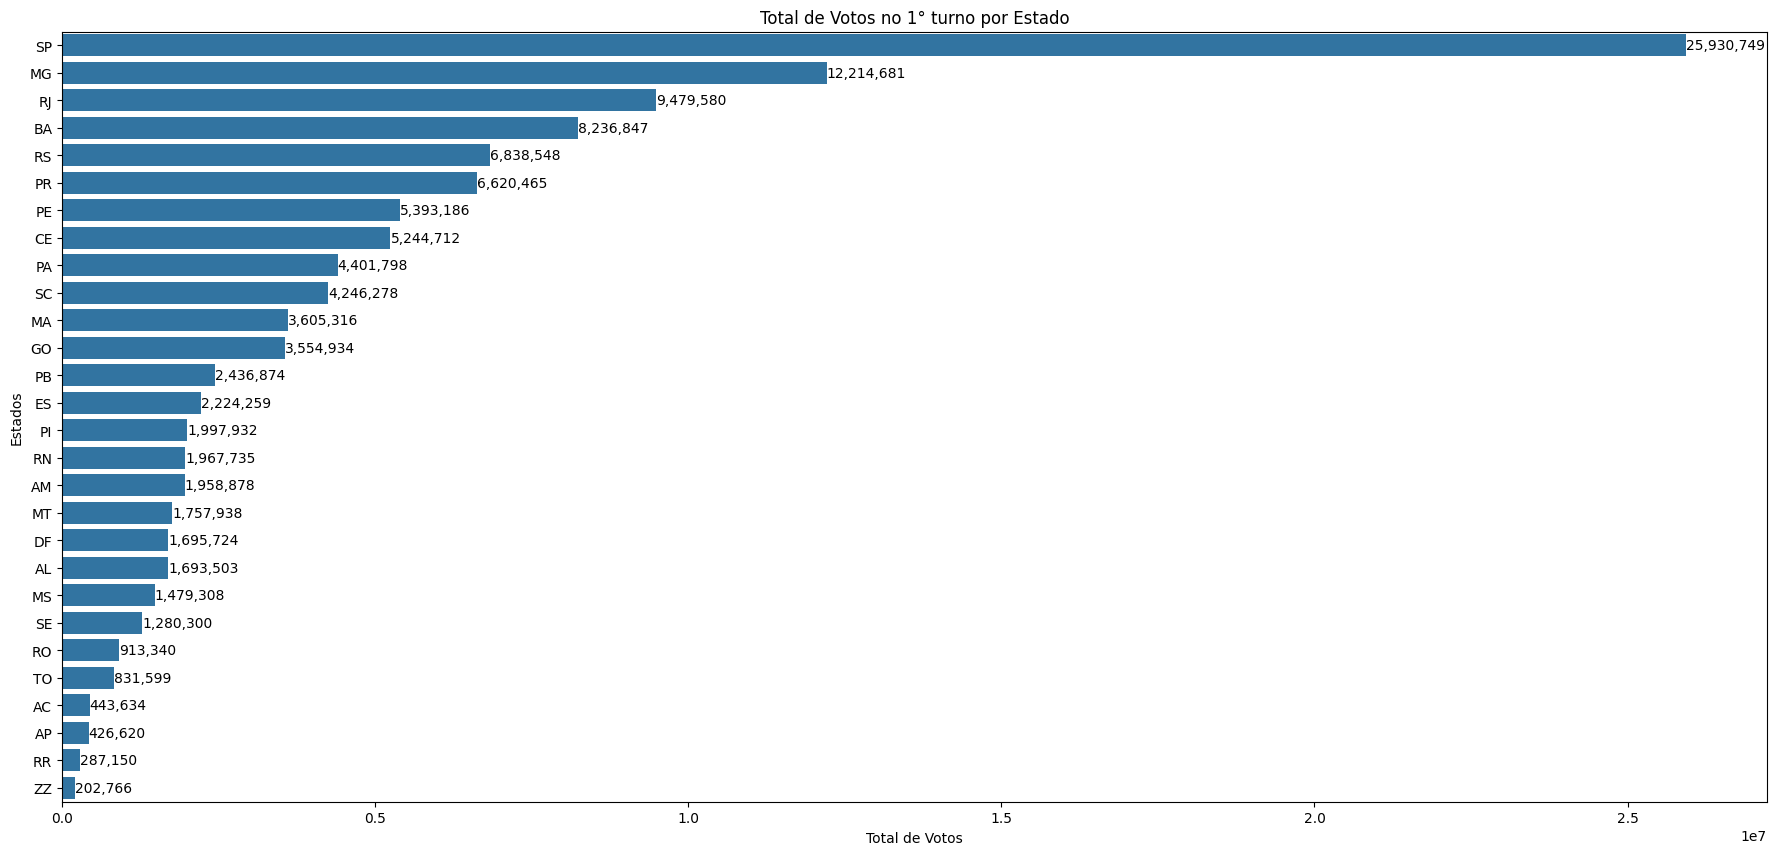

In [ ]:

plt.figure(figsize=(22, 10))
sns.barplot(x=votos_por_estado.values, y=votos_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estados')
plt.title('Total de Votos no 1° turno por Estado')


for i, v in enumerate(votos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()



#**Votos Por Estado no Segundo Turno**

In [ ]:
votos_por_estado_t2 = df_turno2.groupby('SG_UF')['QT_VOTOS'].sum()

votos_por_estado_t2 = votos_por_estado_t2.sort_values(ascending=False)

**Tabela**

In [106]:
votos_por_estado_t2_df = pd.DataFrame({'UF': votos_por_estado_t2.index, 'Total de Votos': votos_por_estado_t2.values})

votos_por_estado_t2_df

,UF,Total de Votos
0,SP,25846143
1,MG,12067502
2,RJ,9421512
3,BA,8200327
4,RS,6777418
5,PR,6595854
6,PE,5377444
7,CE,5158343
8,PA,4218043
9,SC,4217534


**Gráfico**

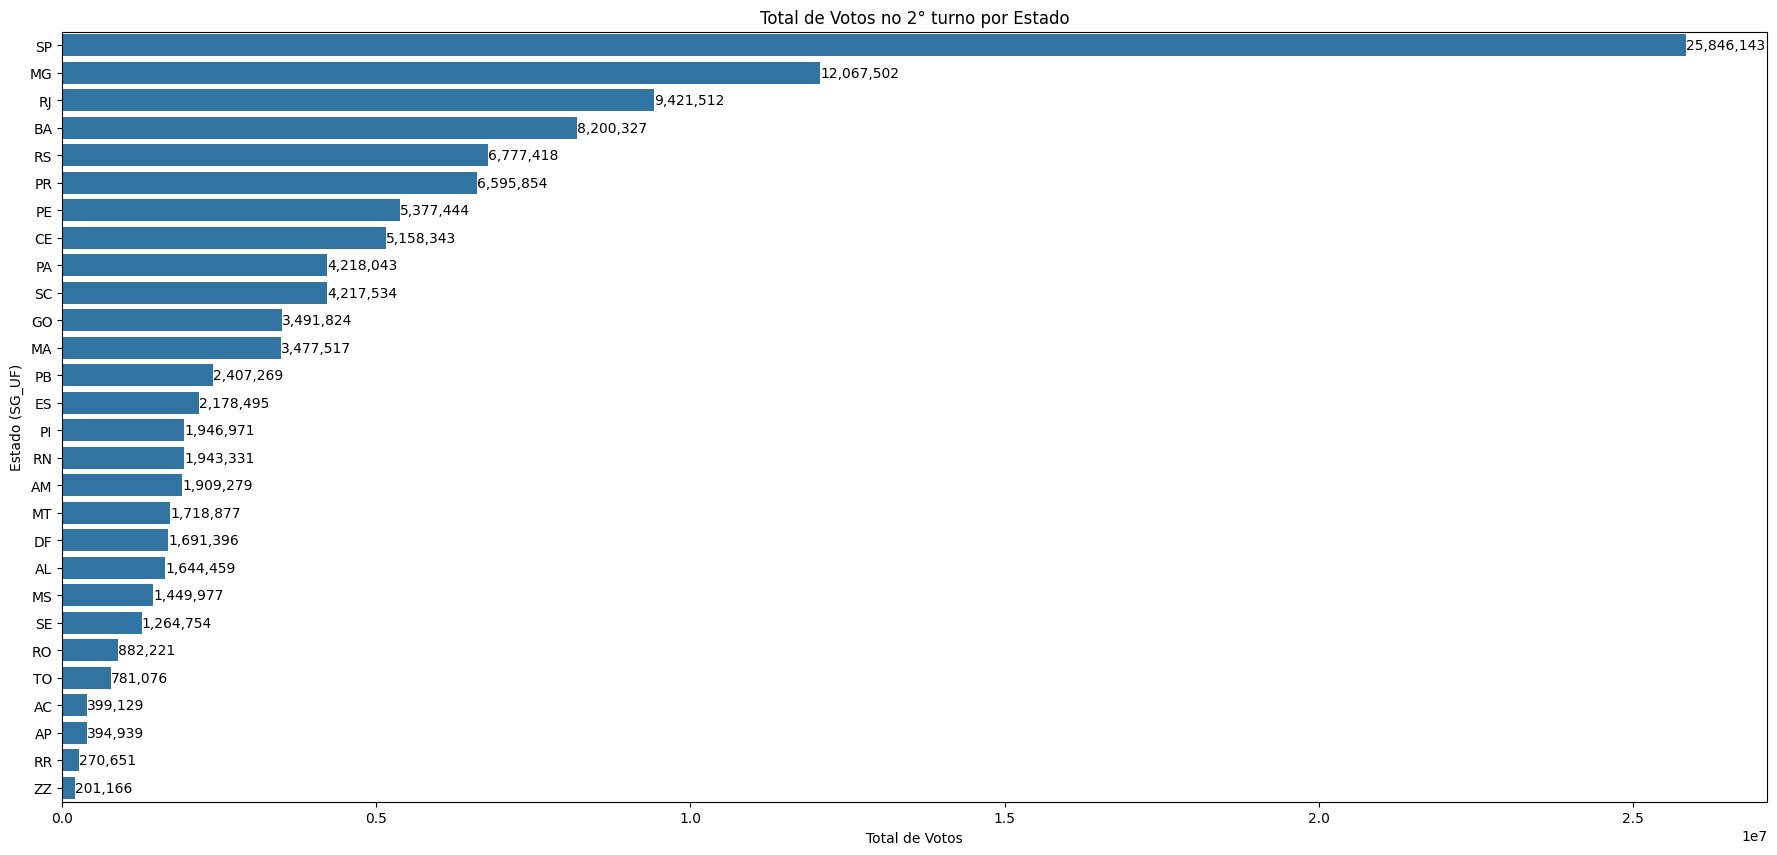

In [107]:
plt.figure(figsize=(22, 10))
sns.barplot(x=votos_por_estado_t2.values, y=votos_por_estado_t2.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estado (SG_UF)')
plt.title('Total de Votos no 2° turno por Estado')

for i, v in enumerate(votos_por_estado_t2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Nulos Por Estado Primeiro Turno**

In [108]:
votos_nulos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_nulos_por_estado = votos_nulos_por_estado.sort_values(ascending=False)

**Tabela**

In [109]:
votos_nulos_df = pd.DataFrame({'UF': votos_nulos_por_estado.index, 'Votos Nulos': votos_nulos_por_estado.values})

print("Tabela de Votos Nulos- Segundo Turno (2018)")
votos_nulos_df

Tabela de Votos Nulos- Segundo Turno (2018)


,UF,Votos Nulos
0,SP,1740759
1,MG,845008
2,BA,697750
3,RJ,653582
4,PE,514413
5,PR,308785
6,CE,252676
7,RS,230716
8,GO,208869
9,PB,204291


**Gráfico**

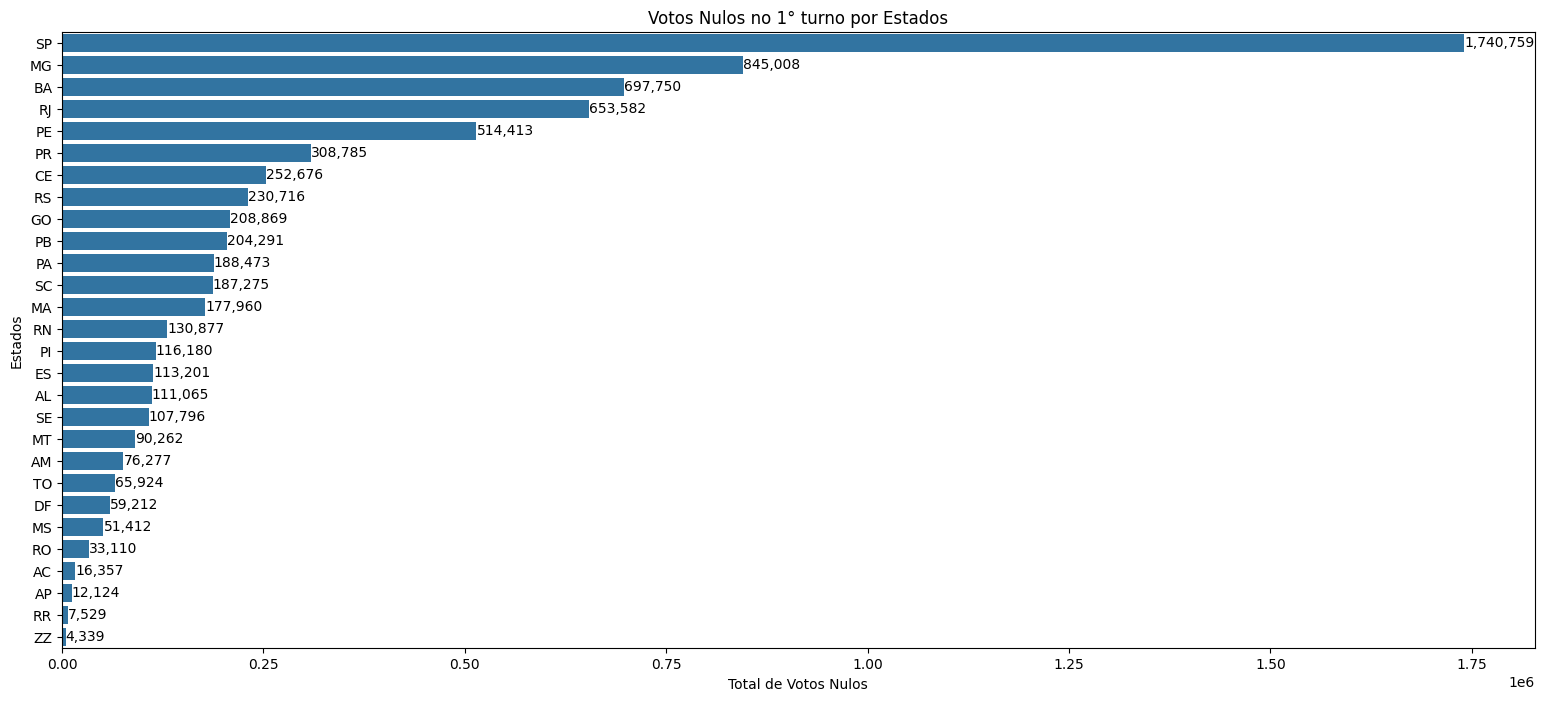

In [110]:
plt.figure(figsize=(19, 8))
sns.barplot(x=votos_nulos_por_estado.values, y=votos_nulos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Votos Nulos no 1° turno por Estados')

for i, v in enumerate(votos_nulos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Nulos Por Estado Segundo Turno**

In [111]:
votos_nulos_por_estado2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_nulos_por_estado2 = votos_nulos_por_estado2.sort_values(ascending=False)

**Tabela**

In [112]:
votos_nulos_df2 = pd.DataFrame({'UF': votos_nulos_por_estado2.index, 'Votos Nulos': votos_nulos_por_estado2.values})

votos_nulos_df2

,UF,Votos Nulos
0,SP,2581039
1,MG,1275394
2,RJ,859238
3,BA,547841
4,RS,411601
5,PE,341822
6,PA,302178
7,PR,290303
8,CE,288048
9,SC,221888


**Gráfico**

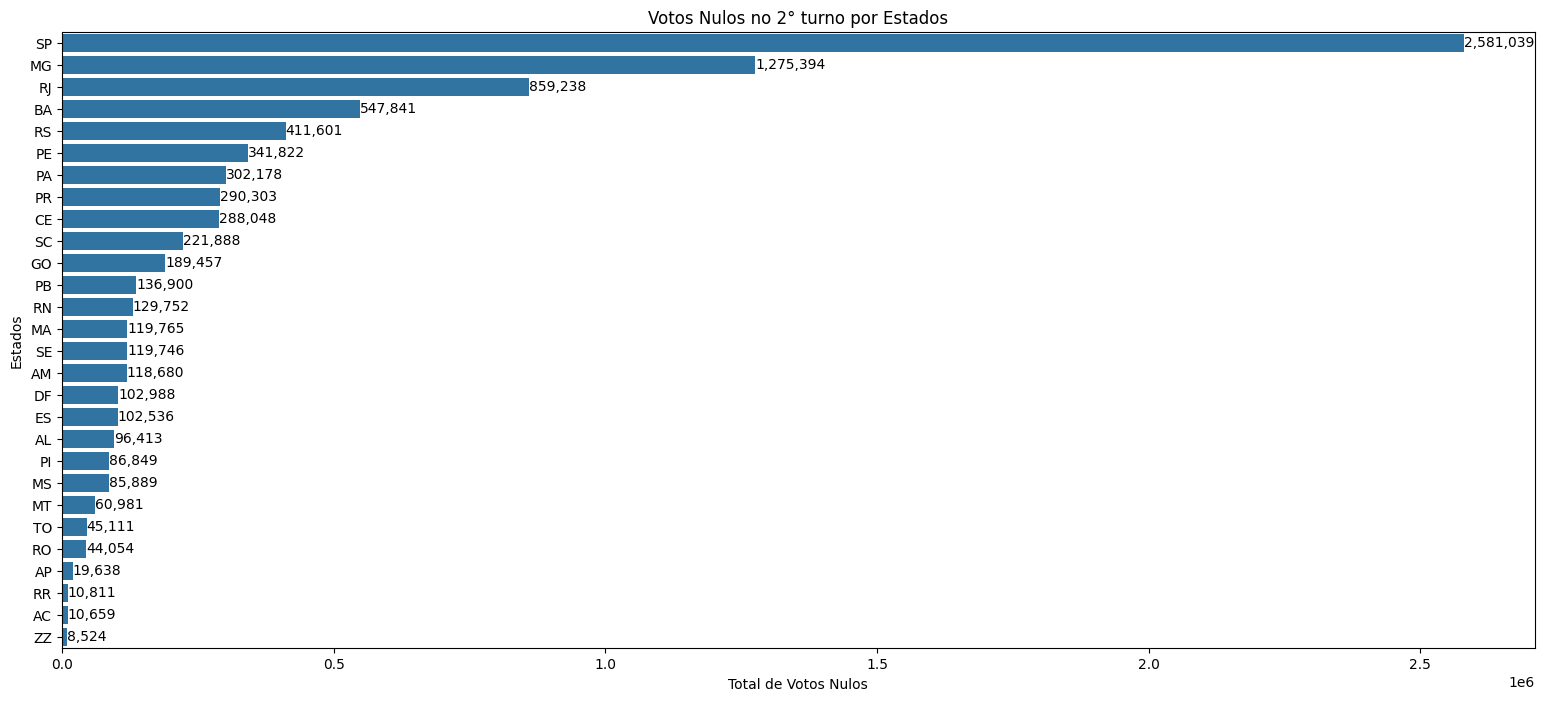

In [113]:
plt.figure(figsize=(19, 8))
sns.barplot(x=votos_nulos_por_estado2.values, y=votos_nulos_por_estado2.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Votos Nulos no 2° turno por Estados')

for i, v in enumerate(votos_nulos_por_estado2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Brancos por Estado no Primeiro Turno**

In [ ]:
votos_brancos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_brancos_por_estado = votos_brancos_por_estado.sort_values(ascending=False)



**Tabela**

In [114]:
votos_brancos_df = pd.DataFrame({'UF': votos_brancos_por_estado.index, 'Votos Brancos': votos_brancos_por_estado.values})
print("Tabela de Votos Brancos por Estado - Primeiro Turno (2018)")
votos_brancos_df

Tabela de Votos Brancos por Estado - Primeiro Turno (2018)


,UF,Votos Brancos
0,SP,837211
1,MG,381959
2,RJ,282605
3,RS,235396
4,BA,169806
5,PR,165991
6,PE,153557
7,CE,111881
8,SC,103220
9,GO,81276


**Gráfico**

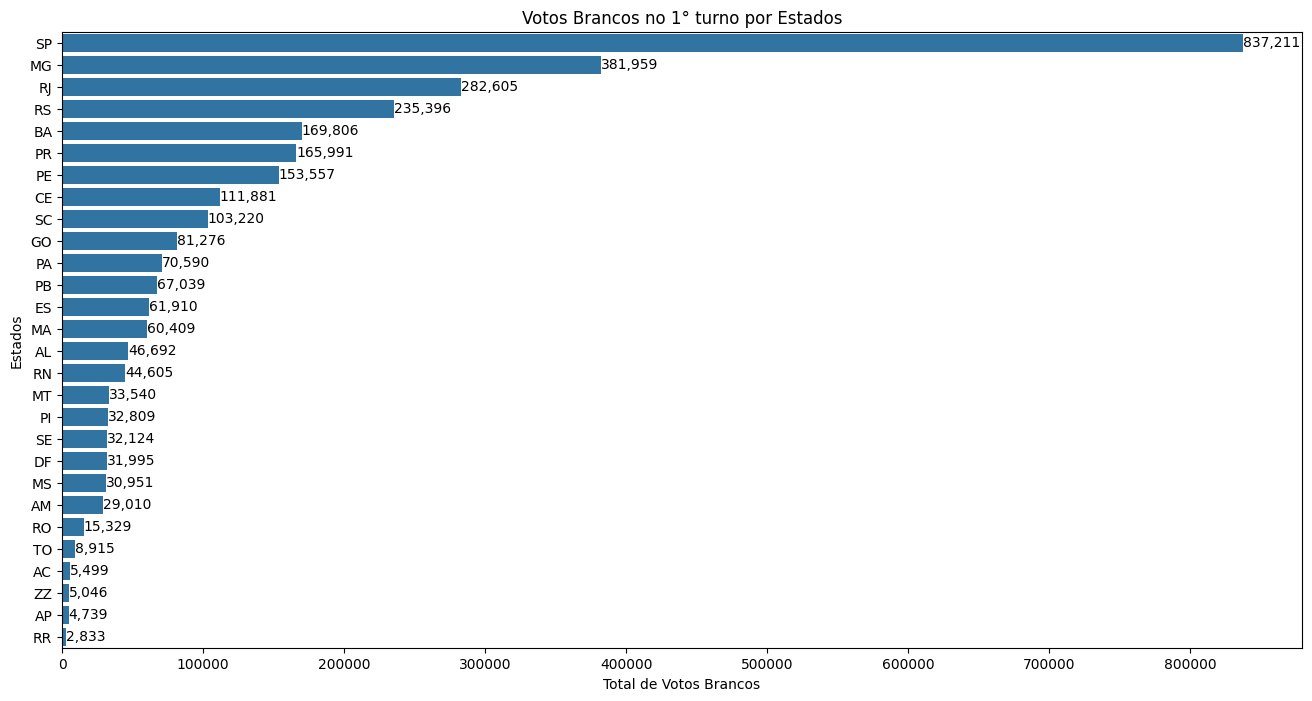

In [115]:
plt.figure(figsize=(16, 8))
sns.barplot(x=votos_brancos_por_estado.values, y=votos_brancos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Votos Brancos no 1° turno por Estados')

for i, v in enumerate(votos_brancos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Brancos por Estado no Segundo Turno**

In [ ]:
votos_brancos_por_estado2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_brancos_por_estado2 = votos_brancos_por_estado2.sort_values(ascending=False)


**Tabela**

In [ ]:
votos_brancos_df2 = pd.DataFrame({'UF': votos_brancos_por_estado2.index, 'Votos Brancos': votos_brancos_por_estado2.values})
print("Tabela de Votos Brancos por Estado - Segundo Turno (2018)")
votos_brancos_df2

Tabela de Votos Brancos por Estado - Segundo Turno (2018)


,UF,Votos Brancos
0,SP,746949
1,MG,309049
2,RJ,219829
3,RS,208909
4,PR,132345
5,BA,107203
6,SC,88680
7,CE,78178
8,PE,76515
9,PA,60908


**Gráfico**

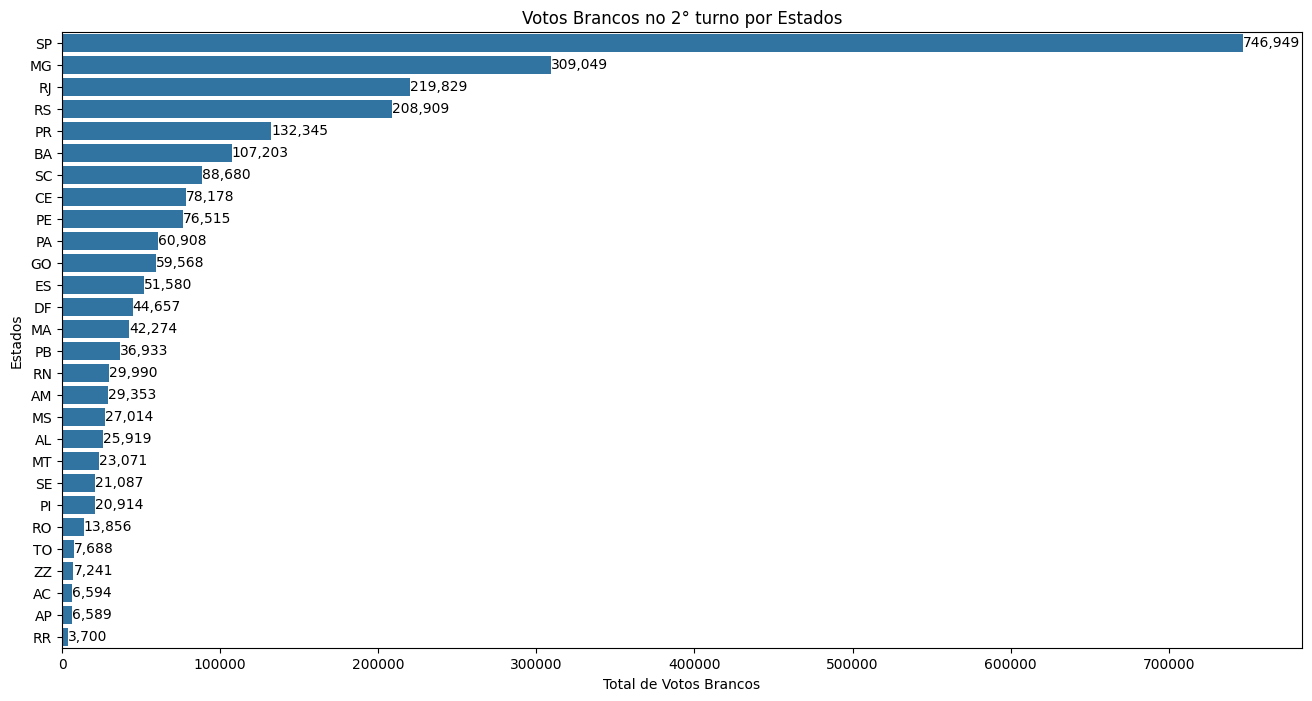

In [117]:
plt.figure(figsize=(16, 8))
sns.barplot(x=votos_brancos_por_estado2.values, y=votos_brancos_por_estado2.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Votos Brancos no 2° turno por Estados')

for i, v in enumerate(votos_brancos_por_estado2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()